<font size="22"> Exploring the Relationship: Predicting Diabetes Risk through Clinical Trial Data Project Report</font> 

<font size="5"> Group 31: Alton Ho, Ivy Feng, Jasmine Li, Marshal Shuai Zhang</font> 

Introduction:

Diabetes is a widespread health concern, demanding proactive strategies for early detection and intervention. This report explores a practical question: "Can we predict a new patient's likelihood of having diabetes based on blood glucose, BMI, and age?" We aim to cut through the complexity and leverage these common health indicators to build a straightforward model for identifying diabetes risk.

High blood glucose, BMI, and age are known factors linked to diabetes. Our study uses real-world data from diverse individuals and employs statistical analyses and machine learning to uncover patterns. The goal is to develop a tool that clinicians can use for early identification and targeted intervention. 

This report seeks not just to contribute to diabetes research but also to make a real impact in clinical settings, promoting early detection, personalized care, and better outcomes for patients.

Final Question: Is the new patient likely to have diabetes based on their blood glucose, BMI, and age?
The reasoning behind choosing these three parameters will be explained below.

In [11]:
#importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(dplyr) 
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



The data we are using is from kaggle. The columns and their meaning are the following: 
- **Pregnancies** represent the number of times an individual has been pregnant. 
- **Glucose** represents plasma glucose concentration for 2 hours in an oral glucose tolerance test. 
- **Blood Pressure** is ​​Diastolic blood pressure measurement (mm Hg). 
- **Skin thickness** measures the Triceps skin fold thickness (mm).
- **Insulin** indicates 2-Hour serum insulin (mu U/ml). 
- **BMI(Body Mass Index)** gives weight in kg/(height in m)², an indicator of a person’s fitness and health level. 
- **Diabetes pedigree function (DPF)** calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. 
- **Age** is the person’s age. 

We will use Blood Glucose, BMI, and Age as our predictors in the following steps

In [16]:
diabetes_data <- read_csv("https://raw.githubusercontent.com/altonho67/dsci-100-2023w1-group-31/main/data/diabetes_2.csv")
#diabetes_data
set.seed(2020)
diabetes_data <- diabetes_data %>%
                 mutate(Outcome = as.factor(Outcome))|>
                 mutate(Outcome = fct_recode(Outcome, "Diabetes" = "1", "None" = "0")) |>
                 mutate_at(c('SkinThickness','Insulin','BloodPressure','Glucose'), ~na_if(., 0))|>
                 na.omit()
                    
                 
head(diabetes_data)
tail(diabetes_data)

#diabetes_split <- initial_split(diabetes_data, prop = 3/4, strata = Outcome)
#diabetes_training <- training(diabetes_split)
#diabetes_testing <- testing(diabetes_split)


#diabetes_vfold <- vfold_cv(diabetes_training, v = 10, strata = Outcome)
#diabetes_vfold

#lm_spec<-linear_reg() |>
#  set_engine("lm") |>
#  set_mode("regression")

#diabetes_recipe <- recipe(Glucose ~ BMI +Age, 
#                        data = diabetes_training) 
  

# use the BMI and Age to predict the glucose
#diabetes_fit <- workflow() |>
#  add_recipe(diabetes_recipe) |>
#  add_model(lm_spec) |>
#  fit(data = diabetes_training)

#diabetes_fit
#this one shows the linear relationship between the BMI and Age with the Glucose, this may not be useful, and can be deleted if you want



Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,89,66,23,94,28.1,0.167,21,None
0,137,40,35,168,43.1,2.288,33,Diabetes
3,78,50,32,88,31.0,0.248,26,Diabetes
2,197,70,45,543,30.5,0.158,53,Diabetes
1,189,60,23,846,30.1,0.398,59,Diabetes
5,166,72,19,175,25.8,0.587,51,Diabetes


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,121,78,39,74,39.0,0.261,28,None
0,181,88,44,510,43.3,0.222,26,Diabetes
1,128,88,39,110,36.5,1.057,37,Diabetes
2,88,58,26,16,28.4,0.766,22,None
10,101,76,48,180,32.9,0.171,63,None
5,121,72,23,112,26.2,0.245,30,None


In [17]:
diabetes_summary <- diabetes_data |>
                 group_by(Outcome) |>
                 map_df(mean)

diabetes_summary

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.292621,122.6158,70.64631,29.12977,155.8855,33.00204,0.5261196,30.83969,NA


In [18]:
diabetes_split <- initial_split(diabetes_data, prop = 3/4, strata = Outcome)
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)



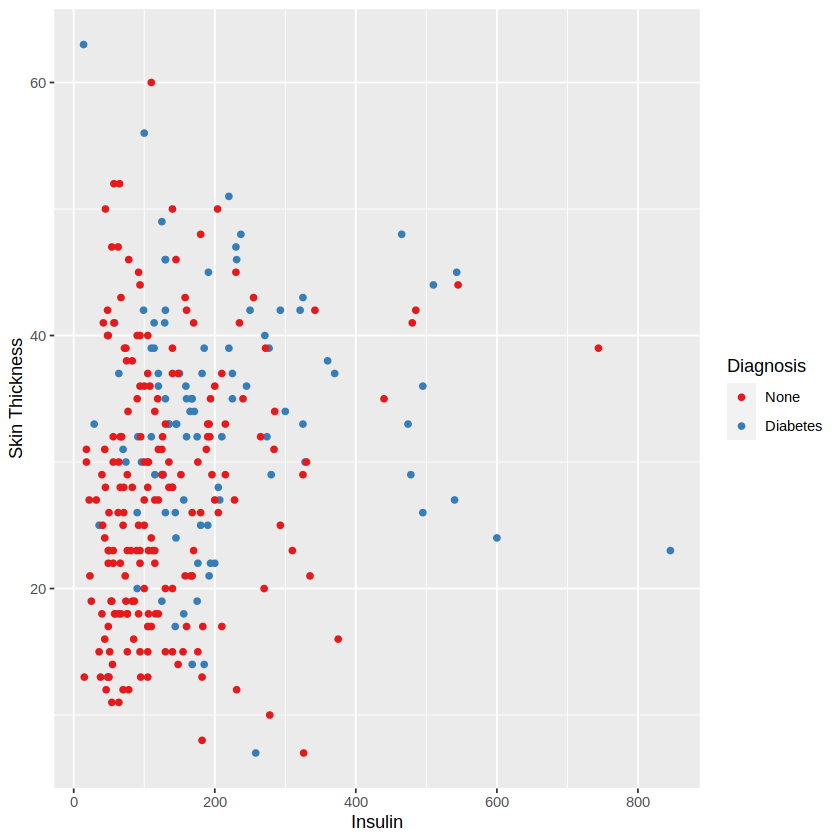

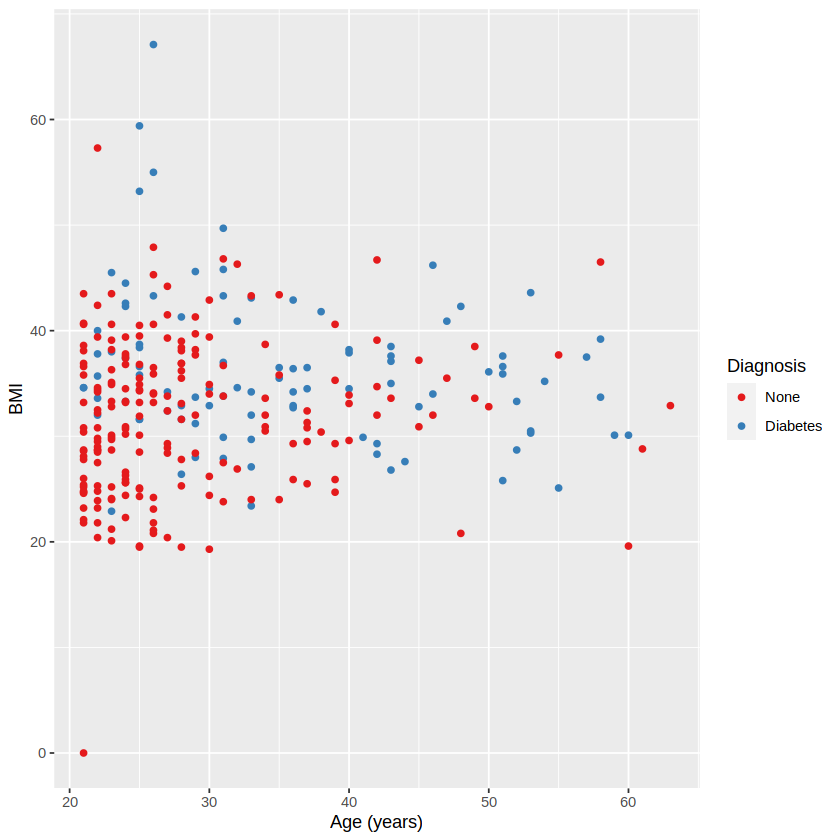

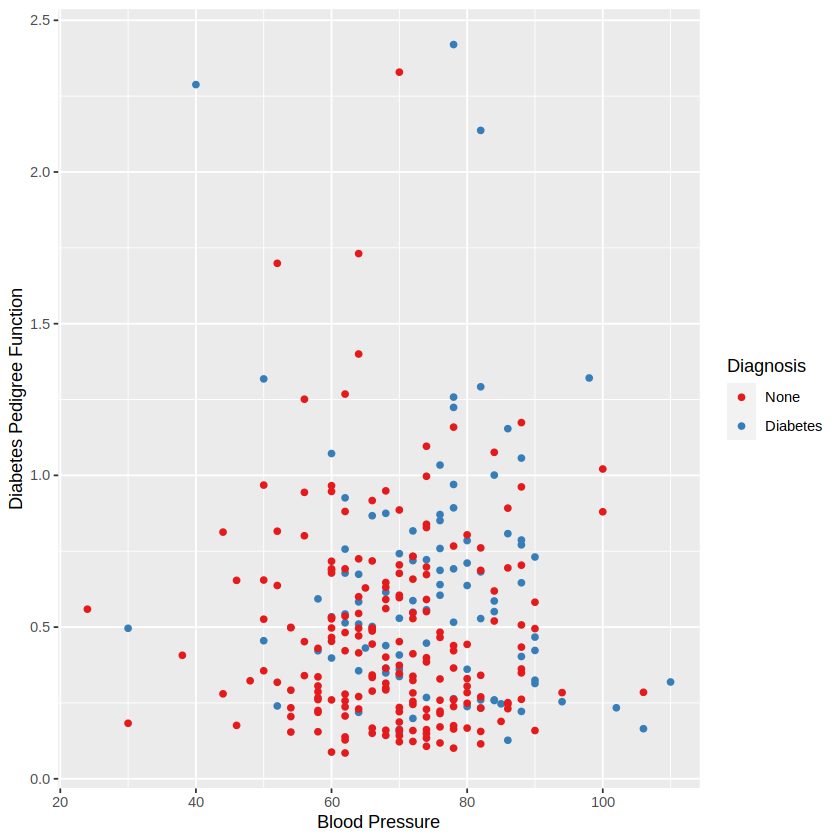

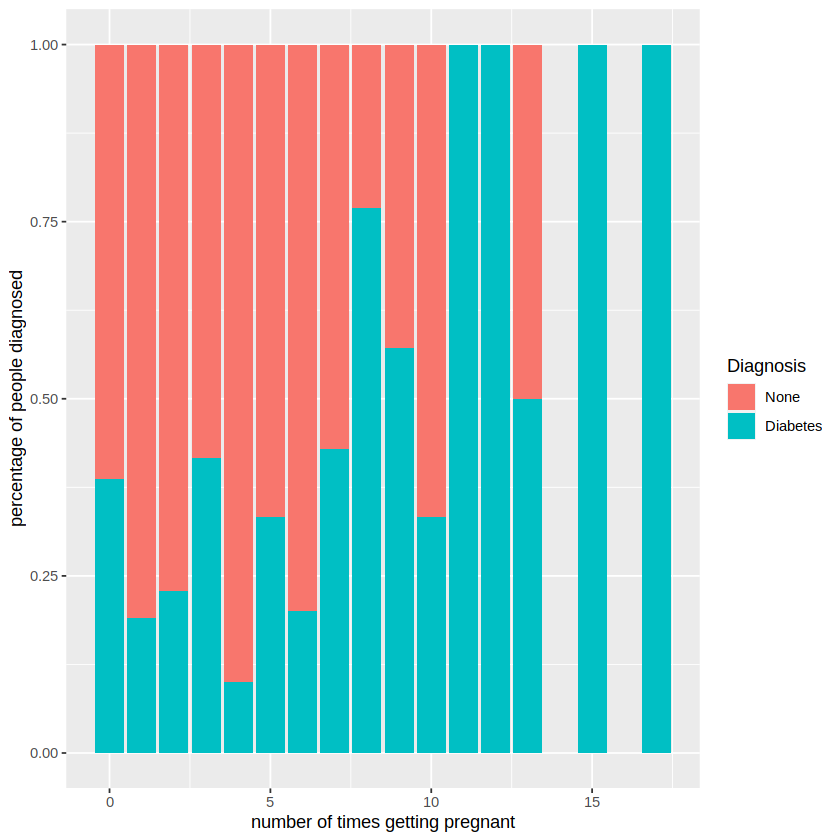

In [19]:
plot1 <- ggplot(diabetes_training, aes(x = Insulin, y = SkinThickness, color = Outcome)) +
                 geom_point() +
                 labs(x = "Insulin", y = "Skin Thickness", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(diabetes_training, aes(x = Age, y = BMI, color = Outcome)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "BMI", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot3 <- ggplot(diabetes_training, aes(x = BloodPressure, y = DiabetesPedigreeFunction, color = Outcome)) +
                 geom_point() +
                 labs(x = "Blood Pressure", y = "Diabetes Pedigree Function", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")
plot4 <- ggplot(diabetes_training, aes(x = Pregnancies, fill = Outcome,na.rm=TRUE)) +
                 geom_bar(position="fill") +
                 labs(x = "number of times getting pregnant", y = "percentage of people diagnosed", fill = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")


plot1
plot2
plot3
plot4

In [20]:
#Standardization
diabetes_recipe <- recipe(Outcome ~ Glucose + BMI + Age, data = diabetes_training)|>
step_scale(all_predictors())|>
step_center(all_predictors())

#Using Knn Model
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

# 5 fold cross validation
diabetes_vfold <- vfold_cv(diabetes_training, v = 5, strata = Outcome)

grid_vals <- tibble(neighbors = c(1:50))

#workflow
knn_result <- workflow()|>
add_recipe(diabetes_recipe)|>
add_model(knn_tune)|>
tune_grid(resamples = diabetes_vfold, grid = grid_vals)

#filter for the most accurate neighbor amount (k-value)
accuracy <- knn_result|>
collect_metrics()|>
filter(.metric == "accuracy")|>
select(neighbors, mean)|>
arrange(desc(mean))


head(accuracy)

neighbors,mean
<int>,<dbl>
41,0.7826437
42,0.7826437
45,0.7826437
46,0.7826437
39,0.7824138
40,0.7824138


Diabetes_outcome_predictions
#this is the knn neighbor prediction of DIabetes outcome using BMI, Glucose and Age, as these three show a positive relationship with diabetes outcome in the proposal, so I am using them to approximate the outcome. More can be added, such as choosing the best k for knn spec and use vfold.


A k-value of 11 or 12 will give us 78.6% accuracy. A Visualization is below.

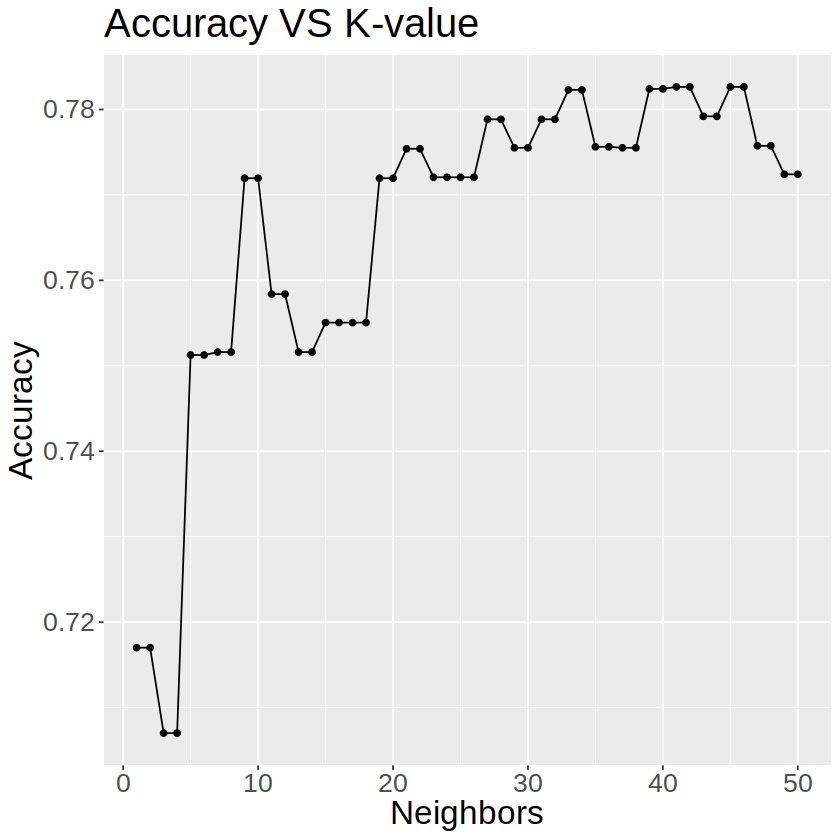

In [23]:
accuracy_vs_k_plot <- accuracy|>
ggplot(aes(x = neighbors, y = mean))+
geom_point()+
geom_line()+
labs(x = "Neighbors", y = "Accuracy", title = "Accuracy VS K-value")+
theme(text = element_text(size = 20))

accuracy_vs_k_plot

In [24]:
set.seed(2020)

diabetes_recipe <- recipe(Outcome ~ Glucose + BMI + Age, data = diabetes_training)|>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12)|>
set_engine("kknn")|>
set_mode("classification")

diabetes_fit <- workflow()|>
add_recipe(diabetes_recipe)|>
add_model(knn_spec)|>
fit(data = diabetes_training)

diabetes_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2040816
Best kernel: rectangular
Best k: 12

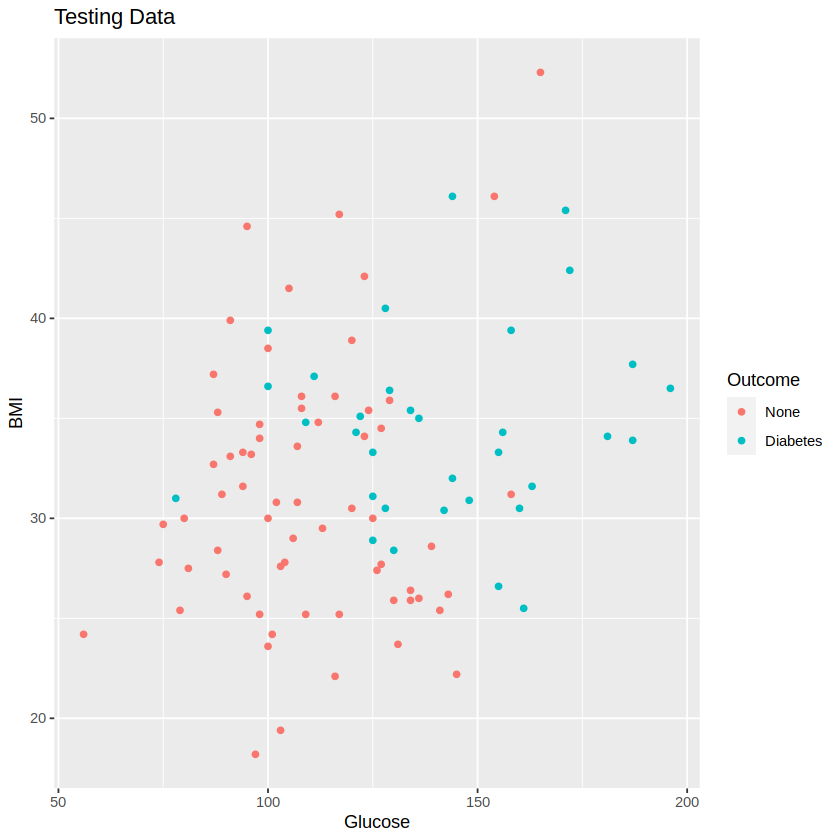

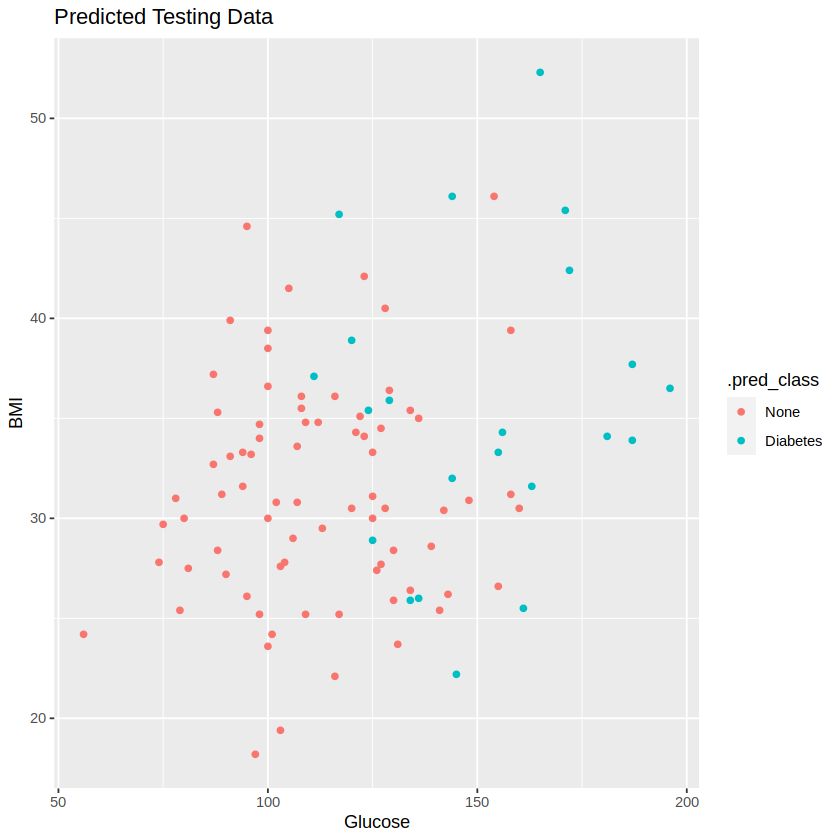

In [25]:
my_predictions <- diabetes_fit|>
  predict(diabetes_testing)|>
  bind_cols(diabetes_testing
           )
my_predictions %>%
        ggplot(aes(x = Glucose, y = BMI, color = Outcome ))+
        geom_point()+
        ggtitle("Testing Data")
my_predictions %>%
        ggplot(aes(x = Glucose, y = BMI, color = .pred_class ))+
        geom_point()+
        ggtitle("Predicted Testing Data")

In [26]:
my_prediction_accuracy <- my_predictions |>
         metrics(truth = Outcome, estimate = .pred_class) 

my_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7272727
kap,binary,0.3305785


In [27]:
diabetes_mat <- my_predictions |> 
       conf_mat(truth = Outcome, estimate = .pred_class)
diabetes_mat

          Truth
Prediction None Diabetes
  None       58       19
  Diabetes    8       14